In [5]:
# !pip install pandas
# !pip install Pillow

In [69]:
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import json

## Creat image template

In [196]:
def create_image(output : str, date : str = "1-kun Dushanba 11-Mart", city : str = "Samarqand", start : str = "04:00", end : str = "19:00"):
    template = Image.open("template.png")
    H, W = template.size
    # Create a drawing context
    draw = ImageDraw.Draw(template)
    


    # Define the position where you want to write the text
    position = (1000, 50)

    # Define the color of the text (in RGB format)
    text_color = (10, 10, 10)  # White color

    # Write the text on the image
    draw.text((925, 100), date, fill=text_color, font=ImageFont.truetype("arial.ttf", 100))
    x = (W - len(city)) / 2
    draw.text((x, 300), city, fill=text_color, font=ImageFont.truetype("arial.ttf", 180))

    draw.text((2_000, 950), start, fill=text_color, font=ImageFont.truetype("arial.ttf", 180))
    draw.text((2_000, 1_525), end, fill=text_color, font=ImageFont.truetype("arial.ttf", 180))

    # Save the image with the text
    template.save(output)

    # Close the template image
    template.close()


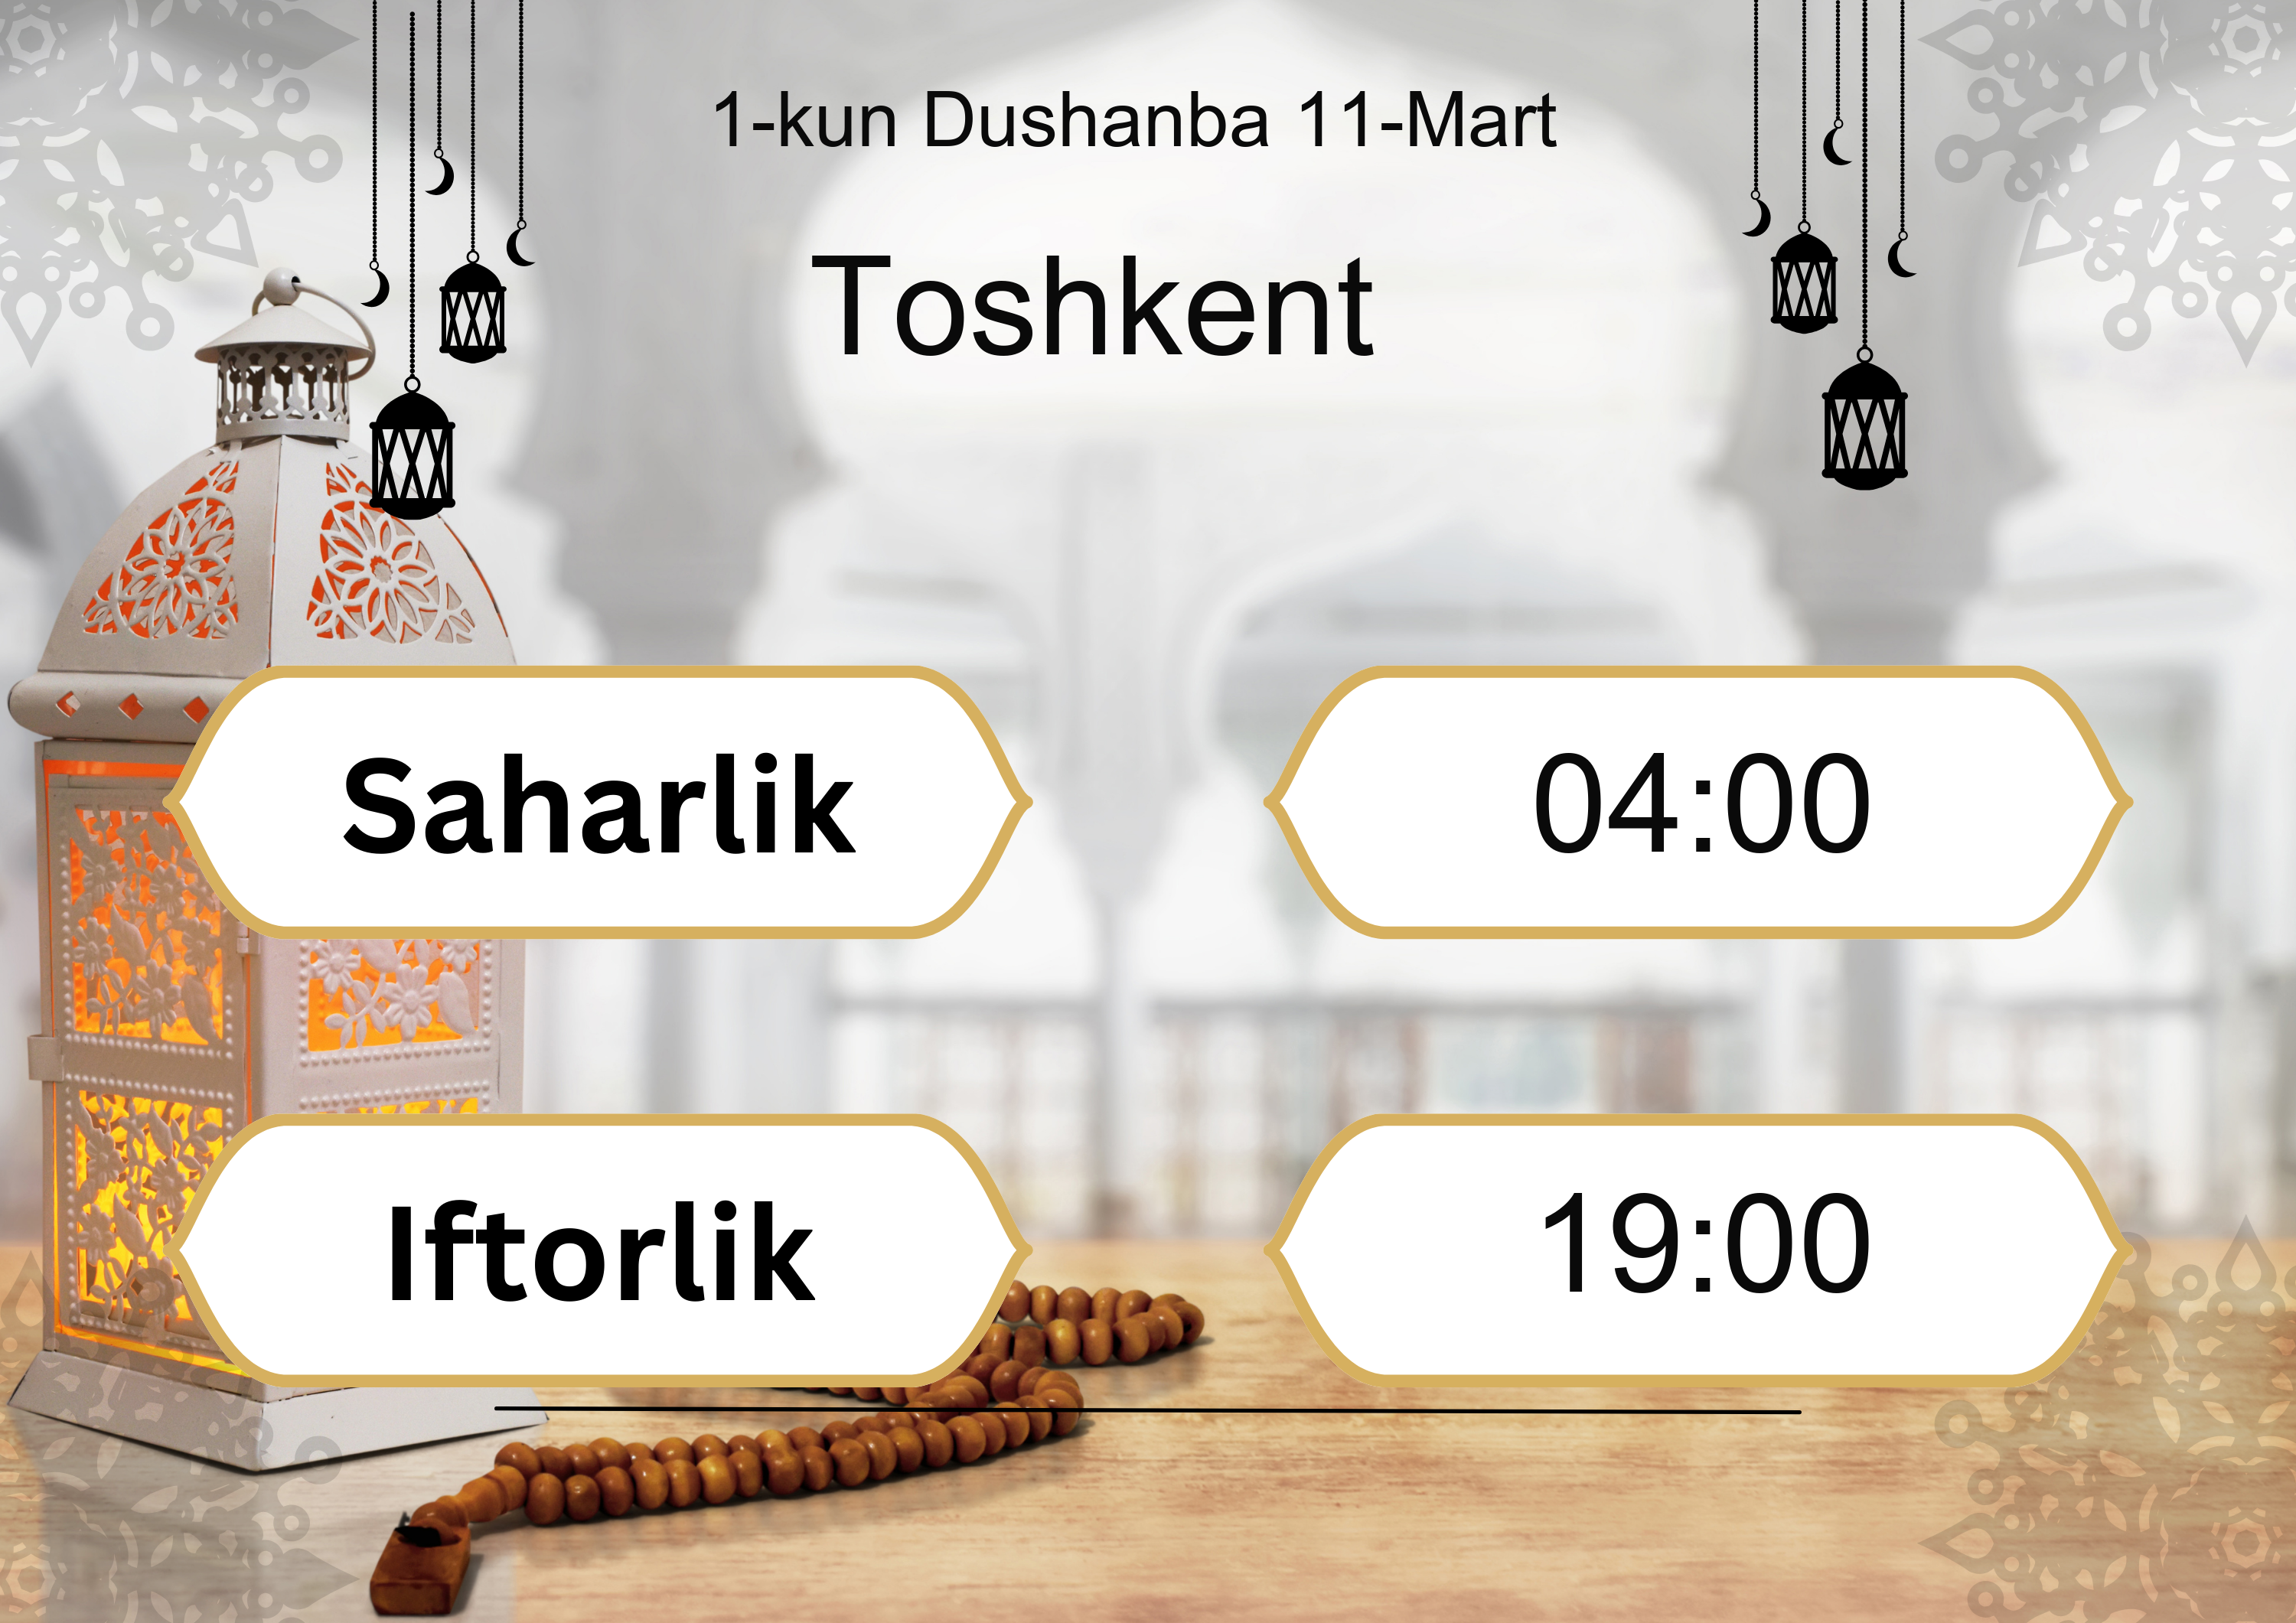

In [199]:
create_image("test.png", city = 'Toshkent')
Image.open("test.png")

## Convert json to pandas

In [71]:
with open("ramadan.json", 'r') as file:
    data = json.load(file)

In [85]:
new_data = {'day' : [], 'city' : [], 'date' : [], 'start' : [], 'end' : [], 'week' : [], 'week_order' : []}
for city_name, city_data in data.items():
    for day_order, day_data in city_data.items():
        new_data['city'].append(city_name)
        new_data['day'].append(day_order)
        
        new_data['date'].append(day_data['date'])
        new_data['start'].append(day_data['start'])
        new_data['end'].append(day_data['end'])
        new_data['week'].append(day_data['week'])
        new_data['week_order'].append(day_data['week_order'])

new_data = pd.DataFrame(new_data)

In [91]:
new_data[(new_data['day'] == '18')]

day           city       date  start    end       week  week_order
17   18        Andijon  2024-3-28  04:41  18:33  Payshanba           3
47   18        Bekobod  2024-3-28  04:55  18:46  Payshanba           3
77   18         Buxoro  2024-3-28  05:15  19:05  Payshanba           3
107  18          Denov  2024-3-28  05:02  18:48  Payshanba           3
137  18       Farg‘ona  2024-3-28  04:44  18:35  Payshanba           3
167  18       Guliston  2024-3-28  04:57  18:48  Payshanba           3
197  18         Jizzax  2024-3-28  05:01  18:52  Payshanba           3
227  18  Kattako‘rg‘on  2024-3-28  05:08  18:59  Payshanba           3
257  18       Namangan  2024-3-28  04:44  18:35  Payshanba           3
287  18         Navoiy  2024-3-28  05:11  19:02  Payshanba           3
317  18          Nukus  2024-3-28  05:30  19:25  Payshanba           3
347  18         Nurota  2024-3-28  05:09  19:01  Payshanba           3
377  18         Qarshi  2024-3-28  05:12  19:00  Payshanba           3
407  18         Qo‘qon  2024-3-28  04:47  18:39  Payshanba           3
437  18      Samarqand  2024-3-28  05:05  18:54  Payshanba           3
467  18     Shahrisabz  2024-3-28  05:06  18:56  Payshanba           3
497  18         Termiz  2024-3-28  05:03  18:52  Payshanba           3
527  18       Toshkent  2024-3-28  04:53  18:46  Payshanba           3
557  18        Urganch  2024-3-28  05:28  19:21  Payshanba           3

In [98]:
new_data['id'] = new_data.index
new_data

day     city       date  start    end        week  week_order   id
0     1  Andijon  2024-3-11  05:11  18:14    Dushanba           1    0
1     2  Andijon  2024-3-12  05:09  18:15    Seshanba           1    1
2     3  Andijon  2024-3-13  05:08  18:16  Chorshanba           1    2
3     4  Andijon  2024-3-14  05:06  18:18   Payshanba           1    3
4     5  Andijon  2024-3-15  05:04  18:19        Juma           1    4
..   ..      ...        ...    ...    ...         ...         ...  ...
565  26  Urganch   2024-4-5  05:13  19:29        Juma           4  565
566  27  Urganch   2024-4-6  05:11  19:31      Shanba           4  566
567  28  Urganch   2024-4-7  05:09  19:32   Yakshanba           4  567
568  29  Urganch   2024-4-8  05:07  19:33    Dushanba           5  568
569  30  Urganch   2024-4-9  05:06  19:34    Seshanba           5  569

[570 rows x 8 columns]

## Creating image data

In [202]:
for index in new_data.index:
    row = new_data.iloc[index, :]
    # print(row)
    
    date = new_data.iloc[index, :].date[:6]
    if date == '2024-3':
        mont = 'Mart'
    else:
        mont = 'Aprel'
    mont_order = row.date.split('-')[-1]
    
    create_image(f"images/{row.id}.png", date = f"{row.day}-kun {row.week} {mont_order}-{mont}", start = row.start, end = row.end, city = row.city)
    # break